In [144]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer, transpile
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

# The starting pattern is represented by this list of numbers.
# Please use it as an input for your solution.
clights = [0, 1, 1, 1, 0, 0, 1, 1, 1]
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_qasm_simulator')

ibmqfactory.load_account:WARNING:2020-11-22 14:54:23,897: Credentials are already in use. The existing account in the session will be replaced.


In [145]:
lights1 = [0, 1, 1, 1, 0, 0, 1, 1, 1]
lights2 = [1, 1, 0, 0, 1, 0, 0, 0, 0]
lights3 = [1, 1, 1, 1, 0, 0, 0, 1, 0]
lights4 = [1, 1, 1, 1, 1, 1, 1, 1, 0]
lights5 = [0, 0, 0, 1, 0, 1, 1, 0, 1]
q1 = [[1, 1, 0, 0, 1, 0, 0, 0, 0], '111100011']
q2 = [[1, 1, 1, 1, 0, 0, 0, 1, 0], '110110011']
q3 = [[0, 0, 1, 1, 1, 0, 0, 0, 1], '101100101']
q4 = [[1, 1, 1, 1, 1, 1, 1, 1, 0], '110110000']
q5 = [[0, 0, 0, 1, 0, 1, 1, 0, 1], '000000101']

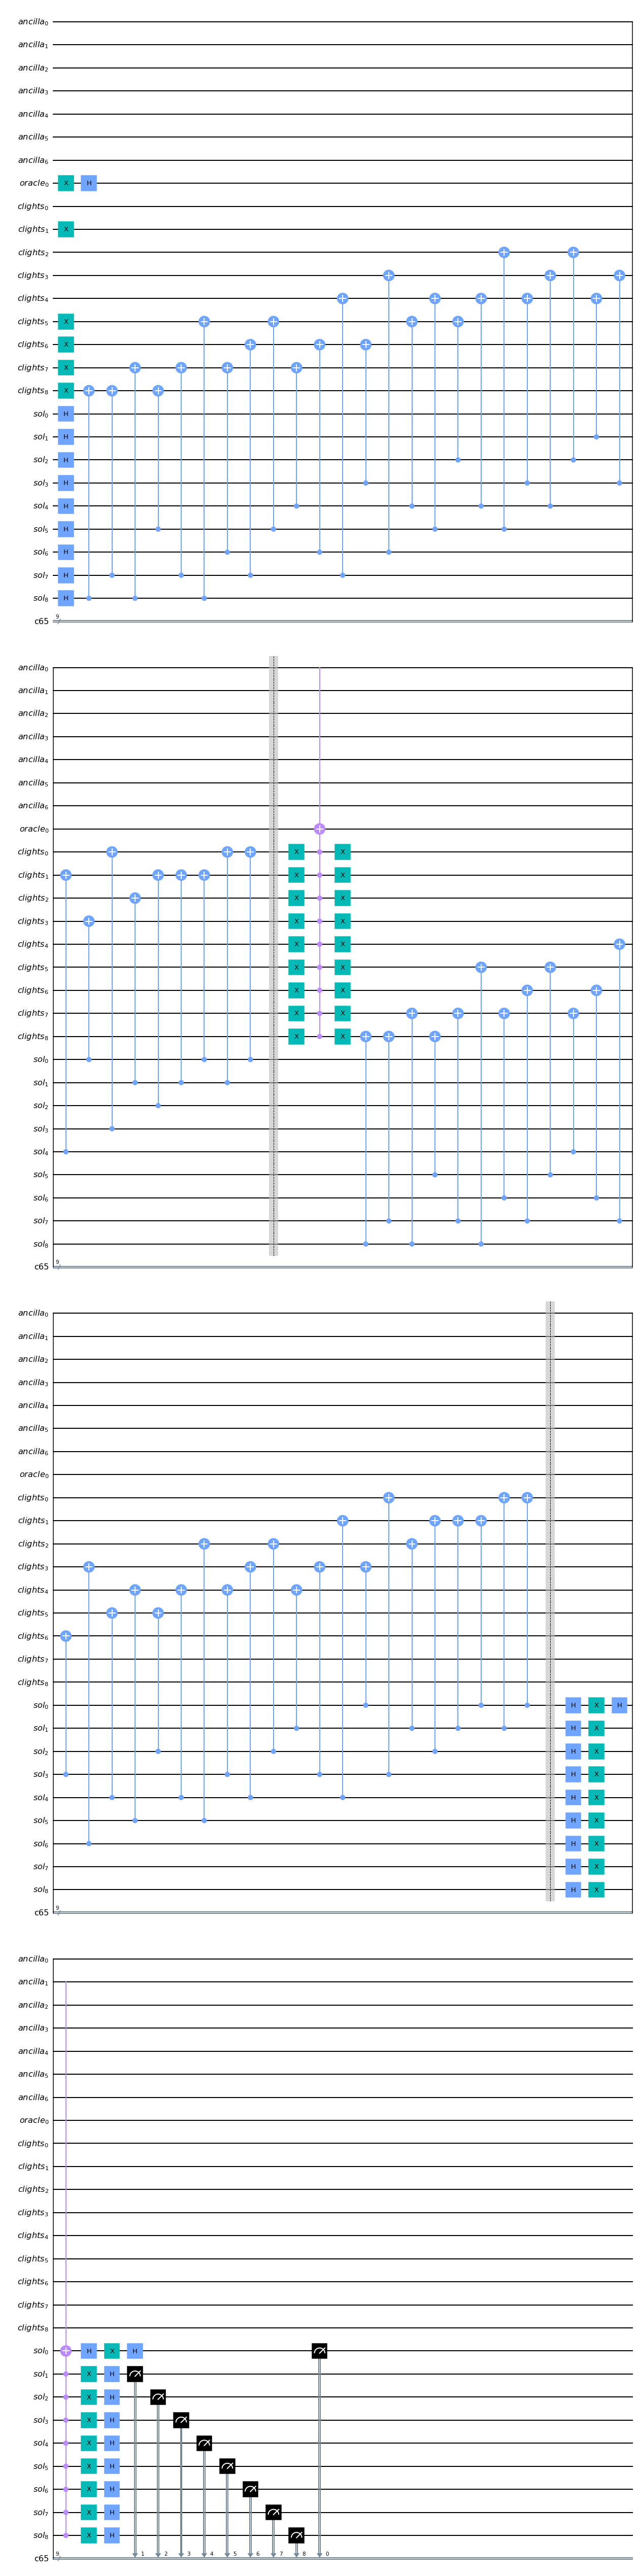

In [147]:
def lightsout(lights):
    
    sol = QuantumRegister(9, name='sol')        # Solution where the flips happen
    oracle = QuantumRegister(1, name='oracle')     # Oracle
    clights = QuantumRegister(9, name='clights')    # Input lights
    ancilla = QuantumRegister(7, name='ancilla')     # Ancilla bits for optimization

    cr = ClassicalRegister(9)       # Measure results
    qc = QuantumCircuit(sol, clights, oracle, ancilla, cr)  #The circuit

    qc.h(sol) #Puts all the solution qubits in a superposition state.


    #initialising lights
    b=len(lights)  #length of lights is 9
    for n in range(b):
        if lights[n] == 1:
            qc.x(clights[n])
    
    #initialising oracle to |- > state which is just an x and then haddamard.
    qc.x(oracle[0])
    qc.h(oracle[0])

    # Oracle-
    ite = 1
    for x in range(ite):
            #When 1st tile is pressed
        qc.cx(sol[0], clights[0])
        qc.cx(sol[0], clights[1])
        qc.cx(sol[0], clights[3])

            #When 2nd tile is pressed
        qc.cx(sol[1], clights[0])
        qc.cx(sol[1], clights[1])
        qc.cx(sol[1], clights[2])
        qc.cx(sol[1], clights[4])


            #When 3rd tile is pressed
        qc.cx(sol[2], clights[1])
        qc.cx(sol[2], clights[2])
        qc.cx(sol[2], clights[5])

            #When 4th tile is pressed the 1st, 3rd(?), 4th and 7th are inverted.
        qc.cx(sol[3], clights[0])
        qc.cx(sol[3], clights[3])
        qc.cx(sol[3], clights[4])
        qc.cx(sol[3], clights[6])

         #When 5th tile is pressed
        qc.cx(sol[4], clights[1])
        qc.cx(sol[4], clights[3])
        qc.cx(sol[4], clights[4])
        qc.cx(sol[4], clights[5])
        qc.cx(sol[4], clights[7])

         #When 6th tile is pressed
        qc.cx(sol[5], clights[2])
        qc.cx(sol[5], clights[4])
        qc.cx(sol[5], clights[5])
        qc.cx(sol[5], clights[8])

          #When 7th tile is pressed
        qc.cx(sol[6], clights[3])
        qc.cx(sol[6], clights[6])
        qc.cx(sol[6], clights[7])

         #When 8th tile is pressed
        qc.cx(sol[7], clights[4])
        qc.cx(sol[7], clights[6])
        qc.cx(sol[7], clights[7])
        qc.cx(sol[7], clights[8])

         #When 9th tile is pressed
        qc.cx(sol[8], clights[5])
        qc.cx(sol[8], clights[7])
        qc.cx(sol[8], clights[8])

        qc.barrier()
        # Do a multi-controlled-toffoli gate
        qc.x(clights[:])
        qc.mct(clights[:],oracle[0], ancilla[:7], mode='basic')
        qc.x(clights[:])

        #Uncompute
    for x in range(ite):
            #When 1st tile is pressed
        qc.cx(sol[0], clights[0])
        qc.cx(sol[0], clights[1])
        qc.cx(sol[0], clights[3])



            #When 2nd tile is pressed
        qc.cx(sol[1], clights[0])
        qc.cx(sol[1], clights[1])
        qc.cx(sol[1], clights[2])
        qc.cx(sol[1], clights[4])




            #When 3rd tile is pressed
        qc.cx(sol[2], clights[1])
        qc.cx(sol[2], clights[2])
        qc.cx(sol[2], clights[5])




            #When 4th tile is pressed the 1st, 3rd(?), 4th and 7th are inverted.
        qc.cx(sol[3], clights[0])
        qc.cx(sol[3], clights[3])
        qc.cx(sol[3], clights[4])
        qc.cx(sol[3], clights[6])

         #When 5th tile is pressed
        qc.cx(sol[4], clights[1])
        qc.cx(sol[4], clights[3])
        qc.cx(sol[4], clights[4])
        qc.cx(sol[4], clights[5])
        qc.cx(sol[4], clights[7])

         #When 6th tile is pressed
        qc.cx(sol[5], clights[2])
        qc.cx(sol[5], clights[4])
        qc.cx(sol[5], clights[5])
        qc.cx(sol[5], clights[8])

          #When 7th tile is pressed
        qc.cx(sol[6], clights[3])
        qc.cx(sol[6], clights[6])
        qc.cx(sol[6], clights[7])

         #When 8th tile is pressed
        qc.cx(sol[7], clights[4])
        qc.cx(sol[7], clights[6])
        qc.cx(sol[7], clights[7])
        qc.cx(sol[7], clights[8])

         #When 9th tile is pressed
        qc.cx(sol[8], clights[5])
        qc.cx(sol[8], clights[7])
        qc.cx(sol[8], clights[8])

        qc.barrier()

        #Diffuser
        qc.h(sol)
        qc.x(sol)
        qc.h(sol[8])
        qc.mct(sol[0:8], sol[8], ancilla[:], mode='basic')
        qc.h(sol[8])
        qc.x(sol)
        qc.h(sol)


    qc.measure(sol[:], cr[:])
    qc = qc.reverse_bits()
    qc = transpile(qc)
    return qc

#lightsout.draw(output='mpl')
cir = lightsout(lights3)
#cir.draw(output='mpl')

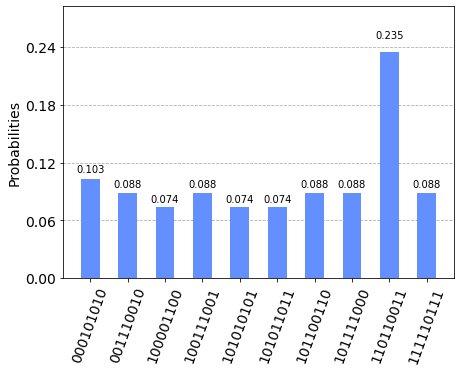

In [149]:
#qc = qc.reverse_bits()
job = execute(cir, backend=backend, shots=1024, seed_simulator=12345, backend_options={"fusion_enable":True})
result = job.result()
count = result.get_counts()
#plot_histogram(count)
from collections import Counter
original_problem_set_counts = count
d = Counter(original_problem_set_counts)
plot_histogram(dict(d.most_common()[:10]))

In [143]:
#Transpile the circuit
for kk in range(4):
   circ = transpile(cir, backend, optimization_level=kk)
   print('Optimization Level {}'.format(kk))
   print('Depth:', circ.depth())
   print('Gate counts:', circ.count_ops())
   print()


Optimization Level 0
Depth: 218
Gate counts: OrderedDict([('cx', 144), ('h', 82), ('t', 52), ('tdg', 52), ('x', 45), ('measure', 9), ('barrier', 2), ('ccx', 2)])

Optimization Level 1
Depth: 218
Gate counts: OrderedDict([('cx', 144), ('h', 82), ('t', 52), ('tdg', 52), ('x', 45), ('measure', 9), ('barrier', 2), ('ccx', 2)])

Optimization Level 2
Depth: 218
Gate counts: OrderedDict([('cx', 144), ('h', 82), ('t', 52), ('tdg', 52), ('x', 45), ('measure', 9), ('barrier', 2), ('ccx', 2)])

Optimization Level 3
Depth: 209
Gate counts: OrderedDict([('cx', 156), ('u2', 52), ('u1', 52), ('x', 45), ('h', 30), ('measure', 9), ('t', 8), ('tdg', 6), ('barrier', 2)])



In [81]:
q1 = [[1, 1, 0, 0, 1, 0, 0, 0, 0], '111100011']
q2 = [[1, 1, 1, 1, 0, 0, 0, 1, 0], '110110011']
q3 = [[0, 0, 1, 1, 1, 0, 0, 0, 1], '101100101']
q4 = [[1, 1, 1, 1, 1, 1, 1, 1, 0], '110110000']
q5 = [[0, 0, 0, 1, 0, 1, 1, 0, 1], '000000101']

1


In [ ]:
lights2=[1, 1, 0, 0, 1, 0, 0, 0, 0]


In [82]:
from collections import Counter
def (cir):
    cir = lightsout(lights)
    job = execute(cir, backend=backend, shots=1024, seed_simulator=12345, backend_options={"fusion_enable":True})
    result = job.result()
    count = result.get_counts()
#plot_histogram(count)
    original_problem_set_counts = count
    d = Counter(original_problem_set_counts)
    plot_histogram(dict(d.most_common()[:10]))

18


In [233]:
job = prepare_ex2a(week2a_ans_func)
result = job.result()
count = result.get_counts()
original_problem_set_counts = count[0]

NameError: name 'prepare_ex2a' is not defined

In [56]:
def add(x,y):
    ans= x+ y
    return ans

def mult(l,f):
    ans2=l*f
    return ans2
        
add(3,5)
mult(1,2)

2

In [ ]:
'110010101'  '101010011'

0
0 a
1
2
3
4
4 a
5
5 a
6
7
8


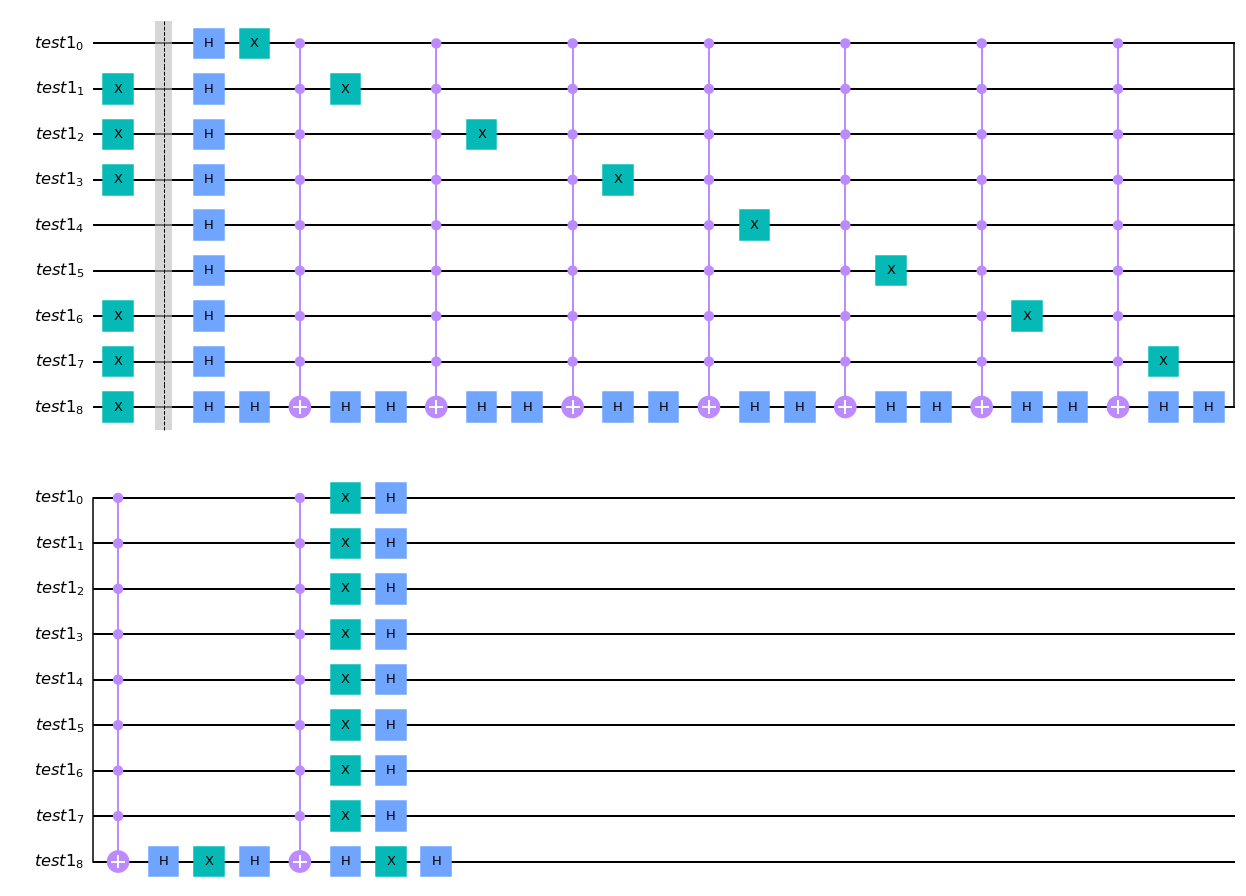

In [224]:
test1 = QuantumRegister(9, name='test1')
qctest = QuantumCircuit(test1)
tin = [0, 1, 1, 1, 0, 0, 1, 1, 1]

b=len(tin)
for n in range(b):
    print(n)
    if tin[n] == 1:
        qctest.x(test1[n])
    else:
        print(n,'a')
        
qctest.draw(output='mpl')
qctest.barrier()
nqubits=9
            # Apply transformation |s> -> |00..0> (H-gates)
for qubit in range(nqubits):
    qctest.h(qubit)
            # Apply transformation |00..0> -> |11..1> (X-gates)
for qubit in range(nqubits):
    qctest.x(qubit)
            # Do multi-controlled-Z gate
    qctest.h(nqubits-1)
    qctest.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qctest.h(nqubits-1)
        # Apply transformation |11..1> -> |00..0>
for qubit in range(nqubits):
    qctest.x(qubit)
            # Apply transformation |00..0> -> |s>
for qubit in range(nqubits):
    qctest.h(qubit)
            
qctest.draw(output='mpl')

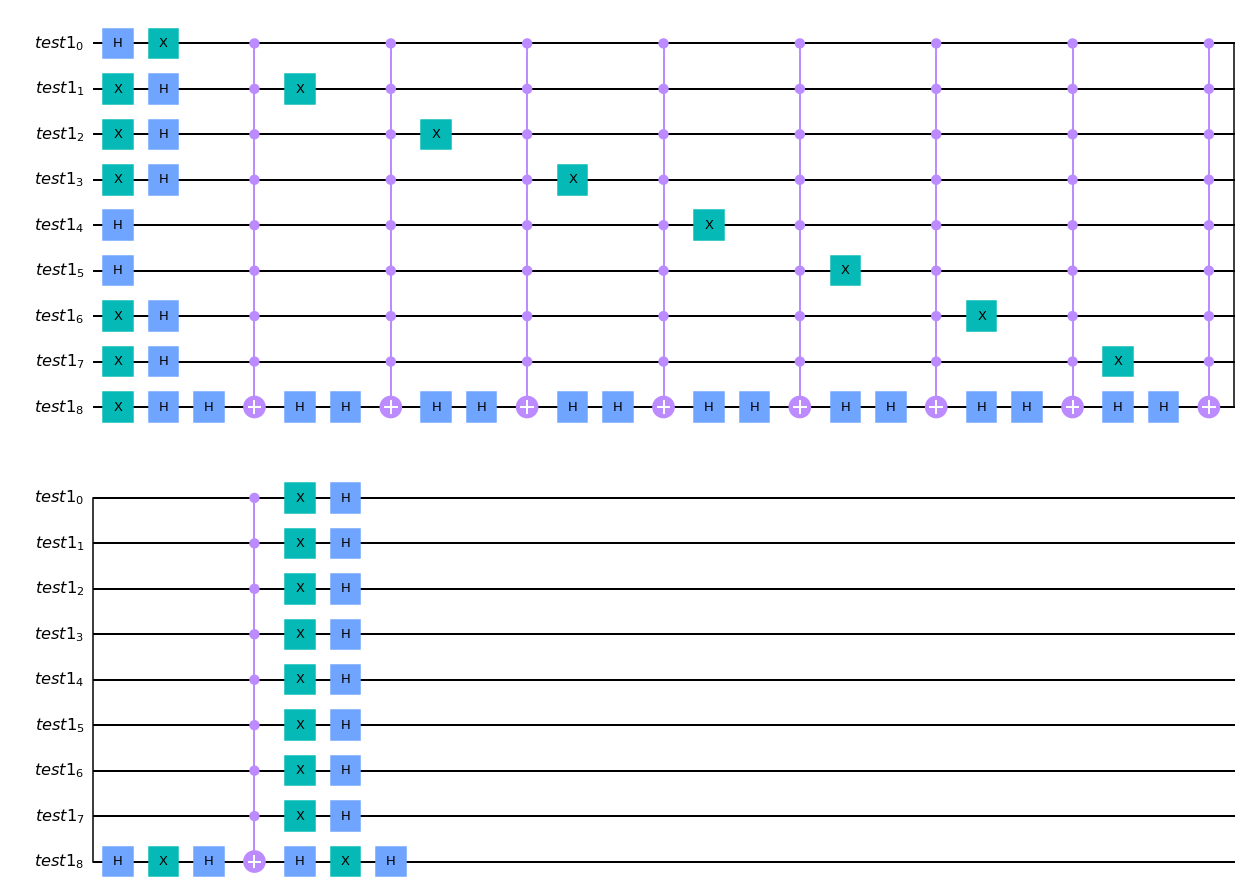

In [ ]:
#Uncomute trial 2
for x in range(ite):
        #When 1st tile is pressed
    qc.cx(lights[0], sol[0])
    qc.cx(lights[1], sol[0],)
    qc.cx(lights[3], sol[0],)

        #When 2nd tile is pressed
    qc.cx(lights[0], sol[1])
    qc.cx(lights[1], sol[1])
    qc.cx(lights[2], sol[1])
    qc.cx(lights[4], sol[1])

        #When 3rd tile is pressed
    qc.cx(lights[1], sol[2])
    qc.cx(lights[2], sol[2])
    qc.cx(lights[5], sol[2])

        #When 4th tile is pressed the 1st, 3rd(?), 4th and 7th are inverted.
    qc.cx(lights[0], sol[3])
    qc.cx(lights[3], sol[3])
    qc.cx(lights[4], sol[3])
    qc.cx(lights[6], sol[3])

     #When 5th tile is pressed
    qc.cx(lights[1], sol[4])
    qc.cx(lights[3], sol[4])
    qc.cx(lights[4], sol[4])
    qc.cx(lights[5], sol[4])
    qc.cx(lights[7], sol[4])

     #When 6th tile is pressed
    qc.cx(lights[2], sol[5])
    qc.cx(lights[4], sol[5])
    qc.cx(lights[5], sol[5])
    qc.cx(lights[8], sol[5])

      #When 7th tile is pressed
    qc.cx(lights[3], sol[6])
    qc.cx(lights[6], sol[6])
    qc.cx(lights[7], sol[6])

     #When 8th tile is pressed
    qc.cx(lights[4], sol[7])
    qc.cx(lights[6], sol[7])
    qc.cx(lights[7], sol[7])
    qc.cx(lights[8], sol[7])

     #When 9th tile is pressed
    qc.cx(lights[5], sol[8])
    qc.cx(lights[7], sol[8])
    qc.cx(lights[8], sol[8])


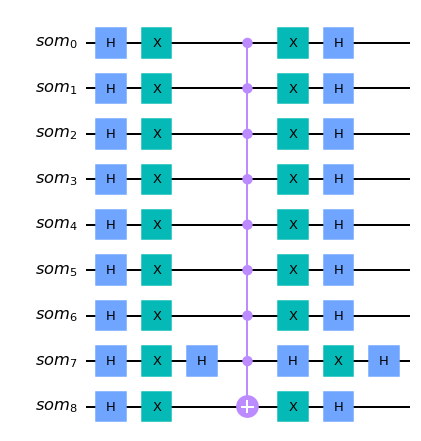

In [77]:
som=QuantumRegister(9, name='som')
qm=QuantumCircuit(som)
qm.h(som)
qm.x(som)
qm.h(som[7])
qm.mct(som[0:8], som[8])
qm.h(som[7])
qm.x(som)
qm.h(som)
qm.draw(output='mpl')